In [25]:
import numpy as np
import pandas as pd
from numpy import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [26]:
# import Housing.csv
df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [27]:
# clean the data
df = df.replace(to_replace = "yes", value = 1)
df = df.replace(to_replace = "no", value = 0) 

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [28]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)
print(len(df_train))
print(len(df_test))

381
164


In [29]:
predictor = 'area'
dependent = 'price'

x = df[predictor].to_numpy().reshape(-1,1)
y = df[dependent].to_numpy().reshape(-1,1)

x_train = df_train[predictor].to_numpy().reshape(-1,1)
y_train = df_train[dependent].to_numpy().reshape(-1,1)

x_test = df_test[predictor].to_numpy().reshape(-1,1)
y_test = df_test[dependent].to_numpy().reshape(-1,1)

2488861398180.657
0.2872931546811468


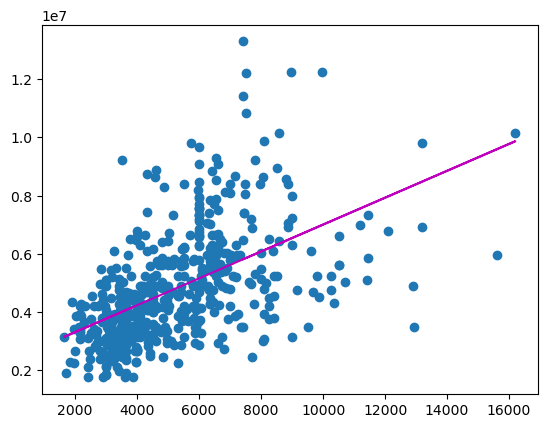

In [30]:
#linear regression
x = x.reshape(-1,1)
y = y.reshape(-1,1)

#train model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

#plot scatterplot
plt.scatter(x,y)

#plot regression_line
plt.plot(x,y_pred, color='m')

mse=mean_squared_error(y, y_pred)
print(mse)

r2= r2_score(y, y_pred)
print(r2)

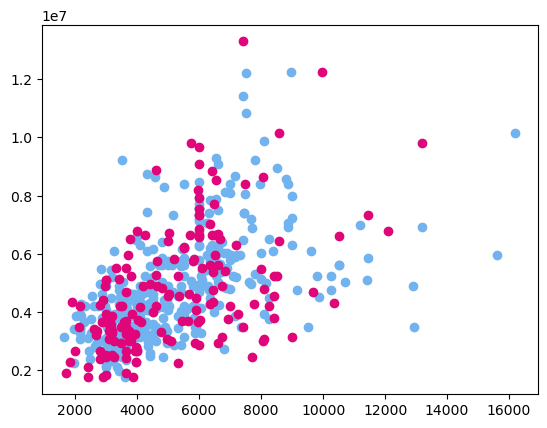

In [31]:
#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#71b3ef')
plt.scatter(x_test,y_test, color='#e00579')

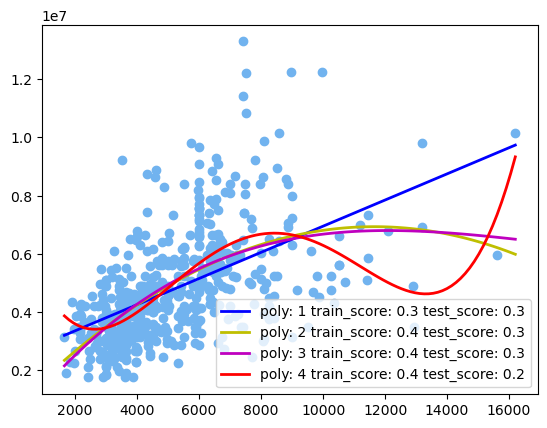

In [35]:
#train polynomial regression models with degrees: 1,2,3,4

degrees = [1,2, 3, 4]
colors=['b','y','m', 'r']

plt.scatter(x, y, color='#71b3ef')

x_train=x_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
x_test=x_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

for i in range(len(degrees)):  
    poly = PolynomialFeatures(degree=degrees[i])
    poly_features = poly.fit_transform(x_train)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    
    y_pred = poly_reg_model.predict(poly_features)
    
    poly_test_features = poly.fit_transform(x_test)
    y_test_pred = poly_reg_model.predict(poly_test_features)
    
    train_score= r2_score(y_train, y_pred) 
    test_score= r2_score(y_test, y_test_pred)
    
    sns.regplot(x=x_train,y=y_pred, order=degrees[i], scatter=False, line_kws={'color': colors[i], 'linewidth':2}, 
                ci=None, label='poly: '+str(degrees[i])+' train_score: '+str(round(train_score, 1))
                +' test_score: '+str(round(test_score, 1)))
    
plt.legend( loc='lower right')    
plt.show()